In [1]:
import pandas as pd
from matplotlib import pyplot as plt

### Import data

In [2]:
marketcap = pd.read_excel('data.xlsx', sheet_name='MV')
price = pd.read_excel('data.xlsx', sheet_name='Price')

marketcap = marketcap.set_index('Date', drop=True).astype(float)
price = price.set_index('Date', drop=True)

ret = price.pct_change()

## Start calculations
Subtract the companies shareprice weighted by the ratio of its market cap to the total S&P500 market cap from the original S&P500 index

In [3]:
faangm = ['Microsoft', 'Facebook', 'Google', 'Amazon', 'Apple', 'Netflix']
ret['SPX_new'] = ret['SPX']

marketcap = marketcap.fillna(0) #fill na with zero's
ret = ret.fillna(0) #fill na with zero's

for company in faangm:
    ret['SPX_new'] -= ret[company] * marketcap[company] / marketcap['SPX']

subsample = '2019-01-01'
ret = ret.loc[subsample:]

cumret = (1+ret[['SPX', 'SPX_new']]).cumprod() - 1


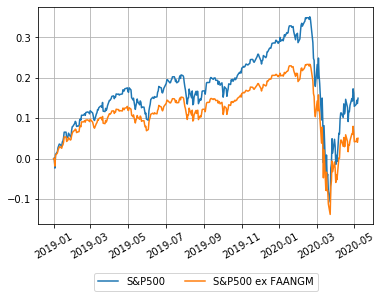

In [4]:
fig, ax = plt.subplots()
plt.plot(cumret)
plt.legend(loc=9, bbox_to_anchor=(0.5, -.2), ncol=2, labels=['S&P500', 'S&P500 ex FAANGM'])
plt.grid()
plt.xticks(rotation=30)
plt.show()